Below is a snippet of code that explain a way in which we could write a csv /excel file through python data frame into the different tabs of the same google sheet(spreadsheet) document.

I have taken an example in which we have a main sheet which contain text data. The data has three columns, we are splitting the data into different sheets, based on the value of particular column.e.g.
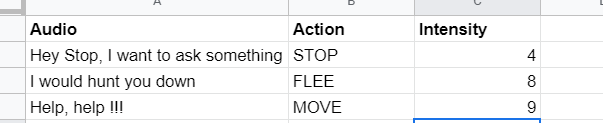

We will try to write the all the rows of records corresponding to a distinct value in Action column to a seperate worksheet. i.e, all the records corresponding to STOP action value would be moved to a seperate worksheet named STOP, and similarly for other action values(i.e FLEE and MOVE) all the rows contains these values, will be written in different tabs of the same document.



In [ ]:
# Validation for Google sheet
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())

You would get a link to navigate to in the browser, it would redirect you to allow access of google sheet to you code (Google Collab is the editor in this case)

In [ ]:
#Paste your dataset's google sheet link in this line
wb = gc.open_by_url('<Enter your sheet containing the dataset link here')

In [ ]:
import pandas as pd
from gspread_dataframe import get_as_dataframe, set_with_dataframe


In [ ]:
sheet = wb.sheet1
data = sheet.get_all_values()
df = pd.DataFrame(data)
df = df.iloc[1:]

In [ ]:
Actions=df.Action.unique()

In [ ]:
#Destination google sheet link
from gspread_dataframe import get_as_dataframe, set_with_dataframe
wb = gc.open_by_url('<Add the link to the google sheet where you want to store the filtered data with different sheets')


In [ ]:
for row in Actions:
  df_new = df[df['Action'] == row ]
  print(df_new)
  wb.add_worksheet(title=row, rows=df_new.shape[0],cols=df_new.shape[1])
  sheetx = wb.worksheet(row)
  set_with_dataframe(sheetx,df_new)
  

Below is the result of the operation

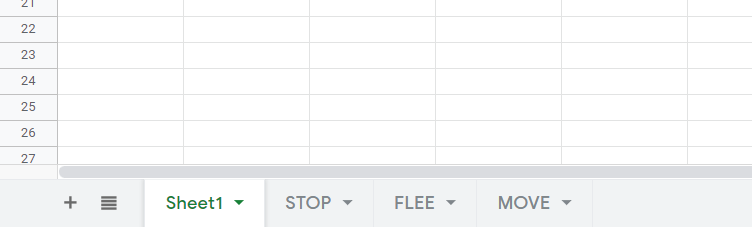